In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Import Dataset

In [4]:
df = pd.read_csv('bank_data.csv')

# Questiion 1 - Descriptive Characteristics

In [ ]:
# Continuous Variables
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns detected:", numeric_cols)

num_summary = df[numeric_cols].describe().T 
display(num_summary)

extra_stats = df[numeric_cols].agg(['var','median','skew','kurt']).T
display(extra_stats)

# Categorical Variables (exclude ID column)
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
if 'id' in cat_cols:
    cat_cols.remove('id')

print("Categorical columns detected:", cat_cols)

for c in cat_cols:
    print(f"\nValue counts and percentages for '{c}':")
    counts = df[c].value_counts(dropna=False)
    percentages = df[c].value_counts(normalize=True, dropna=False) * 100

    # Combine into a single DataFrame for a nice tabular view
    summary_table = pd.DataFrame({
        'Count': counts,
        'Percentage (%)': percentages.round(2)
    })
    display(summary_table)

Numeric columns detected: ['age', 'income', 'children']


,count,mean,std,min,25%,50%,75%,max
age,600.0,42.395000,14.424947,18.00,30.0,42.0,55.250,67.0
income,600.0,27524.031217,12899.468246,5014.21,17264.5,24925.3,36172.675,63130.1
children,600.0,1.011667,1.056752,0.00,0.0,1.0,2.000,3.0


,var,median,skew,kurt
age,2.080791e+02,42.0,0.037589,-1.158559
income,1.663963e+08,24925.3,0.662917,-0.318589
children,1.116725e+00,1.0,0.555817,-1.032562


Categorical columns detected: ['gender', 'region', 'married', 'car', 'savings_acct', 'current_acct', 'mortgage', 'pep']

Value counts and percentages for 'gender':


,Count,Percentage (%)
gender,,
FEMALE,300,50.0
MALE,300,50.0



Value counts and percentages for 'region':


,Count,Percentage (%)
region,,
INNER_CITY,269,44.83
TOWN,173,28.83
RURAL,96,16.00
SUBURBAN,62,10.33



Value counts and percentages for 'married':


,Count,Percentage (%)
married,,
YES,396,66.0
NO,204,34.0



Value counts and percentages for 'car':


,Count,Percentage (%)
car,,
NO,304,50.67
YES,296,49.33



Value counts and percentages for 'savings_acct':


,Count,Percentage (%)
savings_acct,,
YES,414,69.0
NO,186,31.0



Value counts and percentages for 'current_acct':


,Count,Percentage (%)
current_acct,,
YES,455,75.83
NO,145,24.17



Value counts and percentages for 'mortgage':


,Count,Percentage (%)
mortgage,,
NO,391,65.17
YES,209,34.83



Value counts and percentages for 'pep':


,Count,Percentage (%)
pep,,
NO,326,54.33
YES,274,45.67


# Question 2 - Group by PEP

In [ ]:
print("\n--- 2) Compare customers who buy PEP vs who don't ---\n")
if 'pep' not in df.columns:
    raise KeyError("Column 'pep' not found in data — check column names in bank_data.csv")

# numeric summaries by pep
pep_groups_num = df.groupby('pep')[numeric_cols].describe().T
print("Numeric attribute summaries by pep (grouped):")
display(pep_groups_num)

# For quick direct comparison: mean and std by pep
means_by_pep = df.groupby('pep')[numeric_cols].mean().T
stds_by_pep  = df.groupby('pep')[numeric_cols].std().T
comparison = pd.concat([means_by_pep.add_suffix('_mean'), stds_by_pep.add_suffix('_std')], axis=1)
display(comparison)

# categorical attributes distribution by pep (proportions)
cat_summary_by_pep = {}
for c in cat_cols:
    cross = pd.crosstab(df[c], df['pep'], normalize='columns')
    cat_summary_by_pep[c] = cross
    print(f"\nProportions of '{c}' by pep (columns are pep values):")
    display(cross)


--- 2) Compare customers who buy PEP vs who don't ---

Numeric attribute summaries by pep (grouped):


pep                       NO           YES
age      count    326.000000    274.000000
         mean      40.098160     45.127737
         std       14.123506     14.327991
         min       18.000000     18.000000
         25%       27.000000     34.000000
         50%       40.000000     45.000000
         75%       51.000000     58.000000
         max       67.000000     67.000000
income   count    326.000000    274.000000
         mean   24900.953374  30644.919453
         std    11661.123422  13609.613043
         min     5014.210000   7756.360000
         25%    15366.475000  19639.475000
         50%    23105.000000  28080.050000
         75%    31210.900000  38458.350000
         max    61554.600000  63130.100000
children count    326.000000    274.000000
         mean       1.067485      0.945255
         std        1.195524      0.860571
         min        0.000000      0.000000
         25%        0.000000      0.000000
         50%        0.000000      1.000000
         75%        2.000000      1.000000
         max        3.000000      3.000000

pep,NO_mean,YES_mean,NO_std,YES_std
age,40.098160,45.127737,14.123506,14.327991
income,24900.953374,30644.919453,11661.123422,13609.613043
children,1.067485,0.945255,1.195524,0.860571



Proportions of 'gender' by pep (columns are pep values):


pep,NO,YES
gender,,
FEMALE,0.521472,0.474453
MALE,0.478528,0.525547



Proportions of 'region' by pep (columns are pep values):


pep,NO,YES
region,,
INNER_CITY,0.447853,0.448905
RURAL,0.153374,0.167883
SUBURBAN,0.085890,0.124088
TOWN,0.312883,0.259124



Proportions of 'married' by pep (columns are pep values):


pep,NO,YES
married,,
NO,0.257669,0.437956
YES,0.742331,0.562044



Proportions of 'car' by pep (columns are pep values):


pep,NO,YES
car,,
NO,0.515337,0.49635
YES,0.484663,0.50365



Proportions of 'savings_acct' by pep (columns are pep values):


pep,NO,YES
savings_acct,,
NO,0.279141,0.346715
YES,0.720859,0.653285



Proportions of 'current_acct' by pep (columns are pep values):


pep,NO,YES
current_acct,,
NO,0.251534,0.229927
YES,0.748466,0.770073



Proportions of 'mortgage' by pep (columns are pep values):


pep,NO,YES
mortgage,,
NO,0.641104,0.664234
YES,0.358896,0.335766



Proportions of 'pep' by pep (columns are pep values):


pep,NO,YES
pep,,
NO,1.0,0.0
YES,0.0,1.0


# Question 3 - Standardizing Income

In [ ]:
print("\n--- 3) Z-score normalization for income ---\n")
if 'income' not in df.columns:
    raise KeyError("Column 'income' not found in data")
income_mean = df['income'].mean()
income_std  = df['income'].std(ddof=0)
df['income_zscore'] = (df['income'] - income_mean) / income_std
print(f"income mean = {income_mean:.4f}, std = {income_std:.4f}")
display(df[['income','income_zscore']].head())


--- 3) Z-score normalization for income ---

income mean = 27524.0312, std = 12888.7142


,income,income_zscore
0,17546.0,-0.774168
1,30085.1,0.198706
2,16575.4,-0.849474
3,20375.4,-0.554643
4,50576.3,1.788562


# Question 4 - Age Binning

In [16]:
print("\n--- 4) Discretize age into 3 categories (young, mid-age, old) ---\n")
if 'age' not in df.columns:
    raise KeyError("Column 'age' not found in data")

df['age_cat'] = pd.cut(df['age'], bins=[-np.inf, 35, 55, np.inf], labels=['young','mid-age','old'])

print("Counts per age category:")
display(df['age_cat'].value_counts())


--- 4) Discretize age into 3 categories (young, mid-age, old) ---

Counts per age category:


age_cat
mid-age    241
young      209
old        150
Name: count, dtype: int64

# Question 5 - Min Max Normalization

In [17]:
print("\n--- 5) Min-Max normalization for income, age, children ---\n")
# Confirm columns exist
for col in ['income','age','children']:
    if col not in df.columns:
        raise KeyError(f"Column '{col}' not found in data")

def minmax_series(s):
    return (s - s.min()) / (s.max() - s.min())

df['income_mm']   = minmax_series(df['income'])
df['age_mm']      = minmax_series(df['age'])
df['children_mm'] = minmax_series(df['children'])

display(df[['income','income_mm','age','age_mm','children','children_mm']].head())


--- 5) Min-Max normalization for income, age, children ---



,income,income_mm,age,age_mm,children,children_mm
0,17546.0,0.215634,48,0.612245,1,0.333333
1,30085.1,0.431395,40,0.448980,3,1.000000
2,16575.4,0.198933,51,0.673469,0,0.000000
3,20375.4,0.264320,23,0.102041,3,1.000000
4,50576.3,0.783987,57,0.795918,0,0.000000


# Question 6 - Create CSV

In [21]:
possible_id_names = ['id','ID']
cust_id_col = None
for name in possible_id_names:
    if name in df.columns:
        cust_id_col = name
        break

df_numeric = df.copy()

# Overwrite columns in df_numeric using MinMax Normalized versions
df_numeric['income'] = df_numeric['income_mm']
df_numeric['age']    = df_numeric['age_mm']
df_numeric['children'] = df_numeric['children_mm']

# Identify categorical columns for dummies
to_dummy = df_numeric.select_dtypes(include=['object','category']).columns.tolist()

# EXCLUDE the ID column if it's in to_dummy
if cust_id_col and cust_id_col in to_dummy:
    to_dummy.remove(cust_id_col)

print("Categorical columns to convert to dummies (ID excluded):", to_dummy)

# Create dummies (one column per categorical value)
df_dummies = pd.get_dummies(df_numeric[to_dummy].astype(str),
                            prefix=to_dummy,
                            prefix_sep='=',
                            drop_first=False)

# Now create final numeric df
final_numeric_cols = []
if cust_id_col:
    final_numeric_cols.append(cust_id_col)

numeric_dtype_cols = df_numeric.select_dtypes(include=[np.number]).columns.tolist()

# drop the helper columns 'income_mm','age_mm','children_mm' to avoid duplication.
for helper in ['income_mm','age_mm','children_mm']:
    if helper in numeric_dtype_cols:
        numeric_dtype_cols.remove(helper)

final_numeric_cols.extend(numeric_dtype_cols)

df_final_numeric = pd.concat([
    df_numeric[final_numeric_cols].reset_index(drop=True),
    df_dummies.reset_index(drop=True)
], axis=1)

# Save
df_final_numeric.to_csv('bank_numeric.csv', index=False)
print(f"Saved numeric version to: bank_numeric.csv")
print("Shape of bank_numeric.csv:", df_final_numeric.shape)
display(df_final_numeric.head())


Categorical columns to convert to dummies (ID excluded): ['gender', 'region', 'married', 'car', 'savings_acct', 'current_acct', 'mortgage', 'pep', 'age_cat']
Saved numeric version to: bank_numeric.csv
Shape of bank_numeric.csv: (600, 26)


,id,age,income,children,income_zscore,gender=FEMALE,gender=MALE,region=INNER_CITY,region=RURAL,region=SUBURBAN,...,savings_acct=YES,current_acct=NO,current_acct=YES,mortgage=NO,mortgage=YES,pep=NO,pep=YES,age_cat=mid-age,age_cat=old,age_cat=young
0,ID12101,0.612245,0.215634,0.333333,-0.774168,True,False,True,False,False,...,False,True,False,True,False,False,True,True,False,False
1,ID12102,0.448980,0.431395,1.000000,0.198706,False,True,False,False,False,...,False,False,True,False,True,True,False,True,False,False
2,ID12103,0.673469,0.198933,0.000000,-0.849474,True,False,True,False,False,...,True,False,True,True,False,True,False,True,False,False
3,ID12104,0.102041,0.264320,1.000000,-0.554643,True,False,False,False,False,...,False,False,True,True,False,True,False,False,False,True
4,ID12105,0.795918,0.783987,0.000000,1.788562,True,False,False,True,False,...,True,True,False,True,False,True,False,False,True,False


# Question 7 - Correlation Analysis

In [ ]:
corr_df = df_final_numeric.copy()

# Remove Customer ID if present
if cust_id_col and cust_id_col in corr_df.columns:
    corr_df = corr_df.drop(columns=[cust_id_col])

# Compute correlation matrix
corr_matrix = corr_df.corr()
display(corr_matrix)
corr_matrix.to_csv("correlation_matrix.csv")
print("Saved correlation_matrix.csv")

# --- Helper: get base variable name ---
def get_base_name(col):
    # Handle dummy columns: take prefix before '='
    if '=' in col:
        col = col.split('=')[0]
    # Strip common suffixes for scaled/derived versions
    for suffix in ['_mm', '_zscore', '_cat']:
        if col.endswith(suffix):
            col = col[: -len(suffix)]
    return col

# Extract correlations
threshold = 0.5
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['var1','var2','corr']
corr_pairs = corr_pairs[corr_pairs['var1'] != corr_pairs['var2']]

# Remove duplicates
corr_pairs['ordered'] = corr_pairs.apply(lambda r: tuple(sorted([r['var1'], r['var2']])), axis=1)
corr_pairs = corr_pairs.drop_duplicates(subset=['ordered']).drop(columns=['ordered'])

# Filter out correlations between variables with the same base name
corr_pairs = corr_pairs[
    corr_pairs.apply(lambda r: get_base_name(r['var1']) != get_base_name(r['var2']), axis=1)
]

# Filter by threshold
significant = corr_pairs[abs(corr_pairs['corr']) >= threshold].sort_values(by='corr', ascending=False)
print(f"\nCorrelations with |r| >= {threshold} (excluding within-category and derived-variable correlations):")
display(significant)


,age,income,children,income_zscore,gender=FEMALE,gender=MALE,region=INNER_CITY,region=RURAL,region=SUBURBAN,region=TOWN,...,savings_acct=YES,current_acct=NO,current_acct=YES,mortgage=NO,mortgage=YES,pep=NO,pep=YES,age_cat=mid-age,age_cat=old,age_cat=young
age,1.000000,0.752726,0.023572,0.752726,0.090081,-0.090081,-0.025171,1.863535e-02,0.031345,-0.008510,...,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825,0.116715,7.671741e-01,-0.817337
income,0.752726,1.000000,0.036761,1.000000,0.023845,-0.023845,-0.047564,8.477567e-02,0.029824,-0.036431,...,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991,0.054963,5.980377e-01,-0.600078
children,0.023572,0.036761,1.000000,0.036761,0.014206,-0.014206,-0.051222,8.990186e-02,-0.014122,-0.007033,...,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663,-0.047691,3.371933e-02,0.018426
income_zscore,0.752726,1.000000,0.036761,1.000000,0.023845,-0.023845,-0.047564,8.477567e-02,0.029824,-0.036431,...,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991,0.054963,5.980377e-01,-0.600078
gender=FEMALE,0.090081,0.023845,0.014206,0.023845,1.000000,-1.000000,-0.023459,-9.092412e-03,-0.010951,0.040472,...,-0.007207,-0.019466,0.019466,0.066465,-0.066465,0.046843,-0.046843,-0.064595,1.000740e-01,-0.024487
gender=MALE,-0.090081,-0.023845,-0.014206,-0.023845,-1.000000,1.000000,0.023459,9.092412e-03,0.010951,-0.040472,...,0.007207,0.019466,-0.019466,-0.066465,0.066465,-0.046843,0.046843,0.064595,-1.000740e-01,0.024487
region=INNER_CITY,-0.025171,-0.047564,-0.051222,-0.047564,-0.023459,0.023459,1.000000,-3.934436e-01,-0.306032,-0.573814,...,-0.091373,-0.007894,0.007894,-0.002098,0.002098,-0.001054,0.001054,-0.082363,2.128344e-02,0.065404
region=RURAL,0.018635,0.084776,0.089902,0.084776,-0.009092,0.009092,-0.393444,1.000000e+00,-0.148158,-0.277798,...,0.036960,0.008496,-0.008496,0.051908,-0.051908,-0.019714,0.019714,0.013354,2.608085e-17,-0.013740
region=SUBURBAN,0.031345,0.029824,-0.014122,0.029824,-0.010951,0.010951,-0.306032,-1.481580e-01,1.000000,-0.216080,...,0.002605,-0.038157,0.038157,-0.004635,0.004635,-0.062508,0.062508,0.001080,1.896722e-02,-0.018349
region=TOWN,-0.008510,-0.036431,-0.007033,-0.036431,0.040472,-0.040472,-0.573814,-2.777982e-01,-0.216080,1.000000,...,0.068654,0.027431,-0.027431,-0.036591,0.036591,0.059115,-0.059115,0.078891,-3.611198e-02,-0.048355


Saved correlation_matrix.csv

Correlations with |r| >= 0.5 (excluding within-category and derived-variable correlations):


,var1,var2,corr
1,age,income,0.752726
3,age,income_zscore,0.752726
48,income,age_cat=old,0.598038
98,income_zscore,age_cat=old,0.598038
99,income_zscore,age_cat=young,-0.600078
49,income,age_cat=young,-0.600078


# Question 8 - Scatterplot

Saved scatter plot to scatter_income_age.png


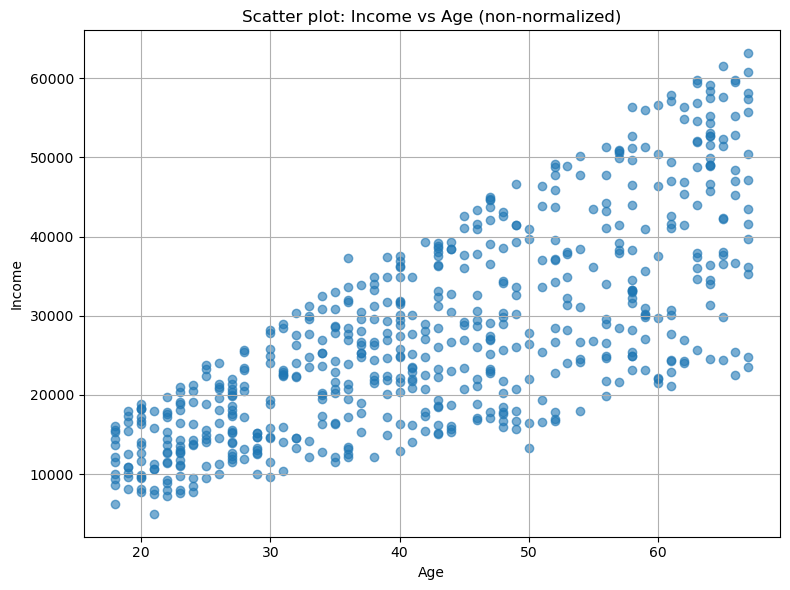

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(df['age'], df['income'], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Scatter plot: Income vs Age (non-normalized)")
plt.grid(True)
plt.tight_layout()
plt.savefig("scatter_income_age.png")
print("Saved scatter plot to scatter_income_age.png")
plt.show()


# Question 9 - Histograms

Saved hist_income_9bins.png


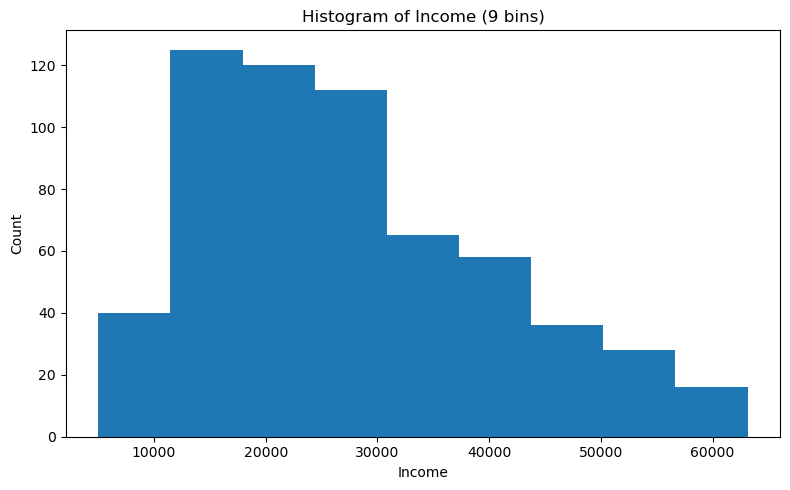

Saved hist_age_15bins.png


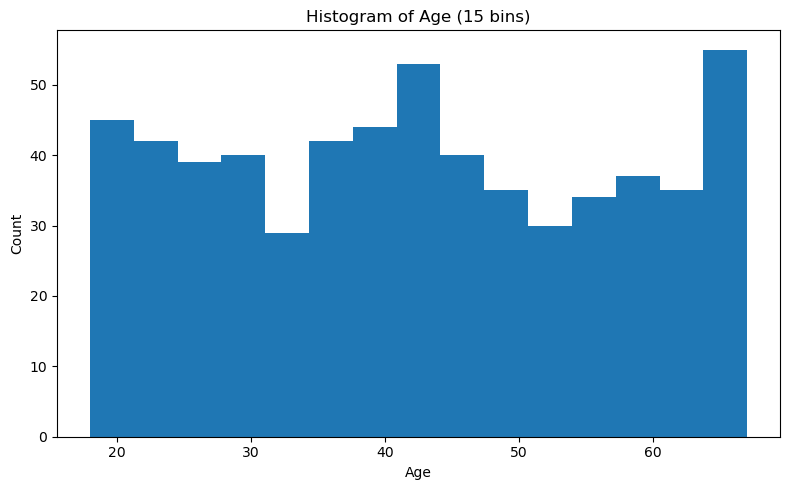

In [29]:
# Income
plt.figure(figsize=(8,5))
plt.hist(df['income'].dropna(), bins=9)
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Histogram of Income (9 bins)")
plt.tight_layout()
plt.savefig("hist_income_9bins.png")
print("Saved hist_income_9bins.png")
plt.show()

# Age
plt.figure(figsize=(8,5))
plt.hist(df['age'].dropna(), bins=15)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of Age (15 bins)")
plt.tight_layout()
plt.savefig("hist_age_15bins.png")
print("Saved hist_age_15bins.png")
plt.show()

# Question 10 - Bar Graph

Saved bar_region_distribution.png


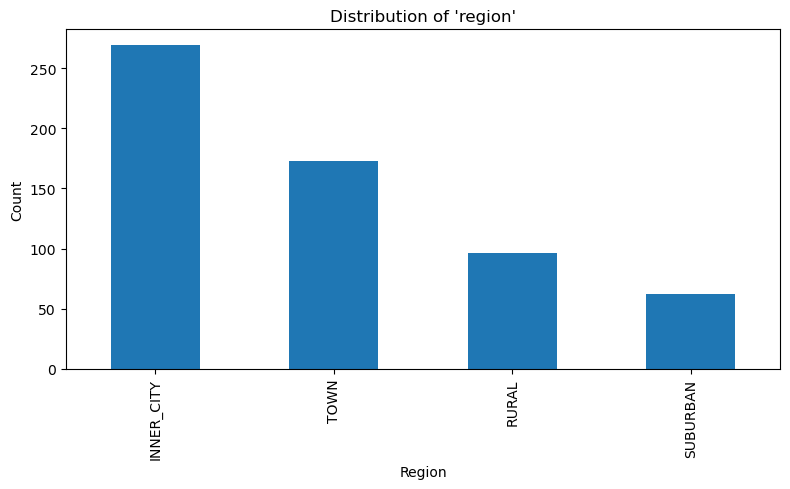

In [30]:
if 'region' not in df.columns:
    raise KeyError("Column 'region' not found in data")
region_counts = df['region'].value_counts()
plt.figure(figsize=(8,5))
region_counts.plot(kind='bar')
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Distribution of 'region'")
plt.tight_layout()
plt.savefig("bar_region_distribution.png")
print("Saved bar_region_distribution.png")
plt.show()

# Question 11 - Cross Tabulation

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


Saved bar_region_pep.png


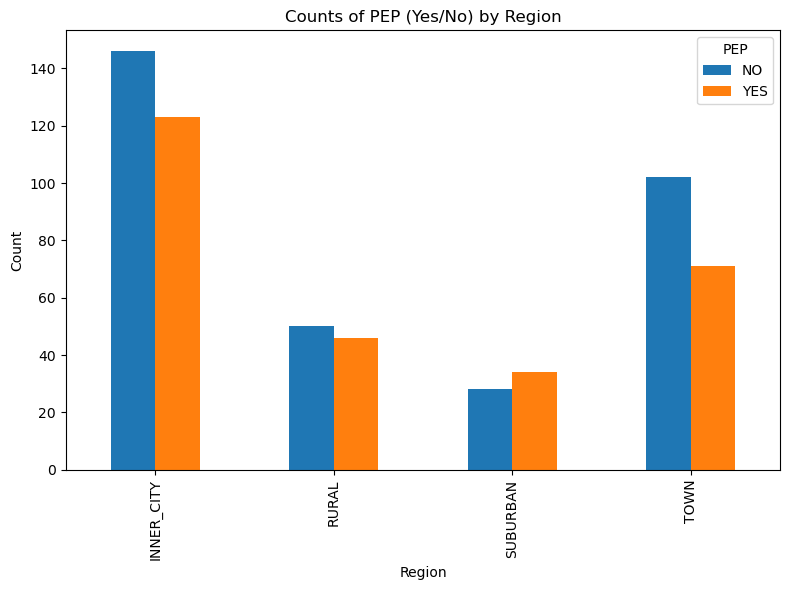

In [ ]:
ct = pd.crosstab(df['region'], df['pep'])
display(ct)   

# Bar chart
ct.plot(kind='bar', figsize=(8,6))
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Counts of PEP (Yes/No) by Region")
plt.legend(title='PEP')
plt.tight_layout()
plt.savefig("bar_region_pep.png")
print("Saved bar_region_pep.png")
plt.show()


# End